# Digit Recognizer 🔢

Dataset : MNIST data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/content/train.csv')

In [3]:
train.head(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train.iloc[:, 1:].values.reshape((len(train), 28, 28))
y = train.iloc[:, 0].values

In [5]:
len(X)

42000

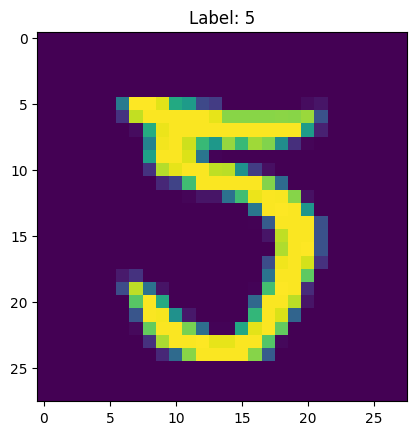

In [6]:
random_num = np.random.randint(0,42000)
sample = X[random_num, :]
sample_label = y[random_num]

plt.imshow(sample)
plt.title(f"Label: {sample_label}")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = X / 255.0

X = np.expand_dims(X, axis=-1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Conv2D(32, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(64, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(64, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
            loss=tf.keras.losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          18496     
                                                        

In [11]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 11s 6ms/step - loss: 0.4696 - accuracy: 0.9121
Epoch 2/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.3031 - accuracy: 0.9601
Epoch 3/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.2829 - accuracy: 0.9643
Epoch 4/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2677 - accuracy: 0.9683
Epoch 5/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2511 - accuracy: 0.9697
Epoch 6/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2520 - accuracy: 0.9708
Epoch 7/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2382 - accuracy: 0.9724
Epoch 8/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2334 - accuracy: 0.9736
Epoch 9/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2211 - accuracy: 0.9746
Epoch 10/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.23

In [12]:
y_pred = model.predict(X_test)

263/263 [==============================] - 1s 3ms/step


In [13]:
y_pred

array([[2.8522957e-09, 3.2009389e-13, 4.9294604e-06, ..., 6.0343137e-13,
        9.9999487e-01, 5.7974159e-08],
       [4.6379110e-08, 9.9998152e-01, 2.6475384e-06, ..., 2.7194264e-06,
        9.2234768e-07, 1.3290891e-06],
       [4.4828427e-10, 6.4091481e-15, 3.8023333e-14, ..., 3.9612771e-09,
        3.6645574e-07, 9.9999928e-01],
       ...,
       [4.6279850e-18, 3.2904499e-11, 1.3323987e-08, ..., 3.8063373e-08,
        6.7345209e-12, 3.6346011e-09],
       [9.9812049e-01, 1.7392292e-10, 2.4890051e-05, ..., 7.0106027e-05,
        4.7353307e-05, 1.6999169e-03],
       [1.0303115e-08, 3.0688142e-13, 1.0483864e-12, ..., 3.8489379e-08,
        1.7314572e-06, 9.9999619e-01]], dtype=float32)

In [14]:
y_pred = np.argmax(y_pred, axis=1)

In [15]:
from sklearn.metrics import r2_score


r2_score(y_test, y_pred)

0.9796348038507248

1/1 [==============================] - 0s 186ms/step


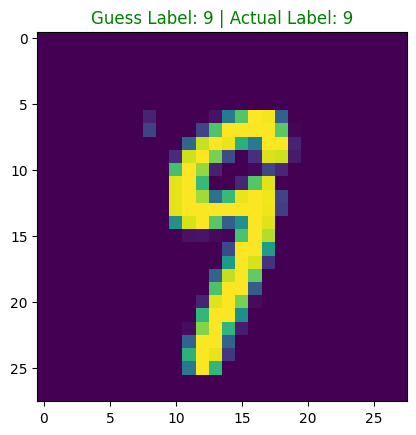

In [16]:
rand_num = np.random.randint(0, 8400)

guess = np.reshape(X_test[rand_num, :], (28, 28))

prediction = model.predict(np.expand_dims(X_test[rand_num], axis=0))
guess_label = np.argmax(prediction, axis=1)
actual_label = y_test[rand_num]

title_color = 'green' if guess_label[0] == actual_label else 'red'

plt.imshow(guess)
plt.title(f"Guess Label: {guess_label[0]} | Actual Label: {actual_label}", color=title_color)
plt.show()